In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Start with MHW event shapes

In [2]:
'''
1. Take the mean of the absolute value of differences (absolute value is the function 
  that replaces negative values with positive values). This is called the mean absolute 
  difference or L1 norm --> no_nans_x_l1_loss_full
2. Take the mean of the square of differences (which makes everything positive) and then 
  take the square root (which undoes the squaring). This is called the root mean squared 
  error (RMSE) or L2 norm --> no_nans_x_MSE_loss_full
'''

# load in data
no_nans_x_full = np.load('/Users/cassiacai/Desktop/no_nans_x_full.npy', allow_pickle=True)
no_nans_x_l1_loss_full = np.load('/Users/cassiacai/Desktop/no_nans_x_l1_loss_full.npy', allow_pickle=True)
no_nans_x_MSE_loss_full = np.load('/Users/cassiacai/Desktop/no_nans_x_MSE_loss_full.npy', allow_pickle=True)

In [3]:
print(len(no_nans_x_l1_loss_full))
print(len(no_nans_x_MSE_loss_full))

1131
1131


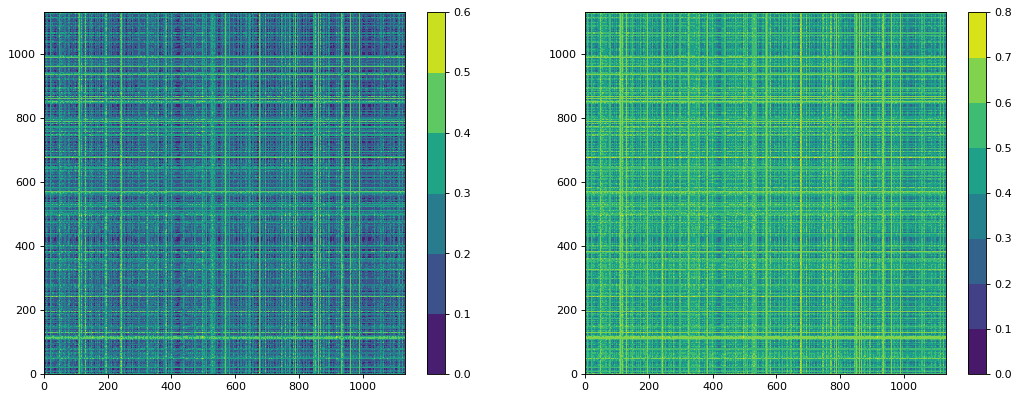

In [4]:
# plotting distance matrices
'''
In mathematics, computer science and especially graph theory, a distance matrix is a 
square matrix containing the distances, taken pairwise, between the elements of a set. 
Depending upon the application involved, the distance being used to define this matrix 
may or may not be a metric.
'''
plt.figure(figsize=(16, 6), dpi=80)
plt.subplot(1, 2, 1); plt.contourf(no_nans_x_l1_loss_full, levels=[0,0.1,0.2,0.3,0.4,0.5,0.6]); plt.colorbar()
plt.subplot(1, 2, 2); plt.contourf(no_nans_x_MSE_loss_full, levels=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]); plt.colorbar()
plt.show()

In [5]:
# small helper function to plot
def plot_grid(XX, N=list):  
    fig, ax = plt.subplots(1, 7, figsize=(30, 3))
    for k in range(7):
        ax[k].contourf(XX[N[k]], cmap='Greys')
        ax[k].axis("on")
        ax[k].set_title(N[k]) # mhw event id

In [6]:
loss_case = no_nans_x_l1_loss_full

In [7]:
means = []
stds = []
no_like_mhws = []
threshold_vals = []

for mhw_id in range(no_nans_x_full.shape[0]):
    sorted_first_row = np.sort(loss_case[mhw_id])
    sorted_first_row_ind = np.argsort(loss_case[mhw_id])
    
    mean = np.nanmean(loss_case[mhw_id])
    threshold_val = mean/2
    smallerthan_threshold = sorted_first_row[sorted_first_row <= threshold_val]
    
    means.append(mean)
    stds.append(np.nanstd(loss_case[mhw_id]))
    threshold_vals.append(mean/2)
    no_like_mhws.append(len(smallerthan_threshold))

In [8]:
thresholding_dataframe = pd.DataFrame(
    {'mean': means,
     'std': stds,
     'no. like mhws': no_like_mhws,
     'std/mean': [i / j for i, j in zip(stds, means)]
     # 'threshold_val': threshold_vals
    })

print(thresholding_dataframe.head())
print()
print(thresholding_dataframe.describe())

       mean       std  no. like mhws  std/mean
0  0.224223  0.069370             29  0.309378
1  0.292143  0.049435              6  0.169216
2  0.088488  0.078853            421  0.891114
3  0.092928  0.085355            467  0.918508
4  0.085270  0.083201            537  0.975738

              mean          std  no. like mhws     std/mean
count  1131.000000  1131.000000    1131.000000  1131.000000
mean      0.129904     0.072881     261.848806     0.681384
std       0.062686     0.013617     208.173462     0.285474
min       0.083876     0.031504       1.000000     0.095815
25%       0.088573     0.066519      28.000000     0.421228
50%       0.099146     0.077909     300.000000     0.789753
75%       0.153029     0.083715     474.000000     0.935404
max       0.458587     0.087440     553.000000     1.025826


         mean       std  no. like mhws  std/mean
451  0.084533  0.085216            553  1.008081
27   0.086105  0.084399            549  0.980184
539  0.085253  0.086056            547  1.009422
723  0.085146  0.086257            547  1.013056
514  0.086056  0.083585            545  0.971285
         mean       std  no. like mhws  std/mean
160  0.086674  0.087440            521  1.008841
522  0.086315  0.087383            521  1.012382
754  0.088269  0.087314            511  0.989186
705  0.087277  0.087265            509  0.999865
698  0.088064  0.087263            510  0.990903
..        ...       ...            ...       ...
801  0.234297  0.035992              1  0.153615
510  0.340127  0.034776              1  0.102243
581  0.347941  0.033338              1  0.095815
80   0.276861  0.032892              1  0.118804
22   0.308443  0.031504              1  0.102140

[1131 rows x 4 columns]


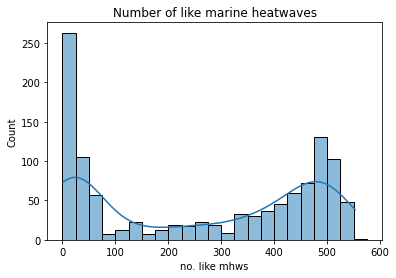

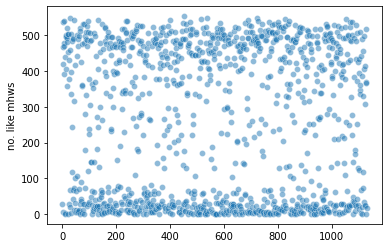

In [9]:
# let's take a look at the heatwaves that are similar to a lot of other heatwaves
print(thresholding_dataframe.sort_values(by=['no. like mhws'], ascending=False).head())
print(thresholding_dataframe.sort_values(by=['std'], ascending=False).iloc[: , :10])

sns.histplot(thresholding_dataframe['no. like mhws'],bins=np.arange(0,600,25),kde=True).set(title='Number of like marine heatwaves')
plt.show()
sns.scatterplot(x=thresholding_dataframe.index,y=thresholding_dataframe['no. like mhws'], alpha=0.5)
plt.show()

# --------------------------------------------------------------------------------
# Observations: We have a large number of heatwaves that are not very similar to 
# other heatwaves. We also have a large number of heatwaves that are incredibly
# similar (according to our metrics). So bimodal distribution. We should look
# at the two cases carefully. We should also look at the groups.
# --------------------------------------------------------------------------------

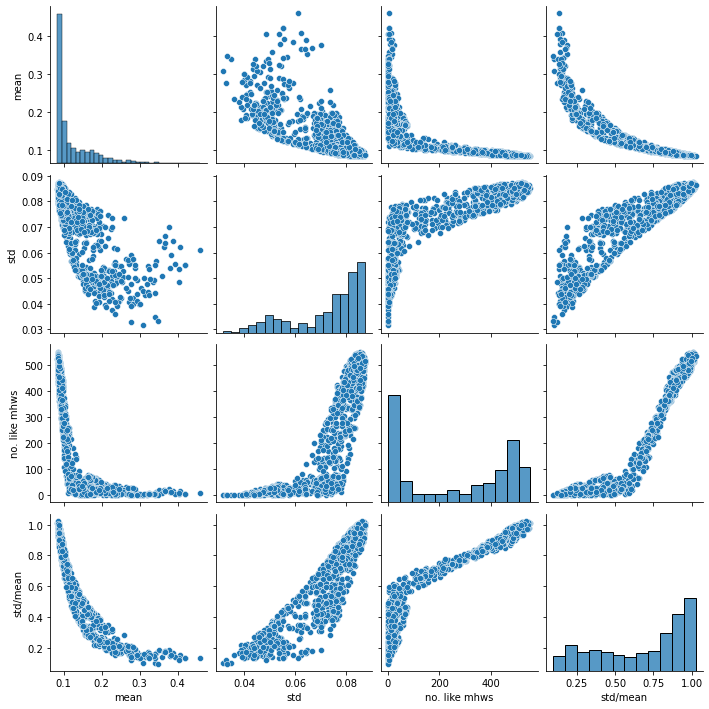

In [10]:
sns.pairplot(thresholding_dataframe,height=2.5) #kind = "kde"
plt.show()

mean: 0.2242230288768543
std: 0.06936969583119106
We have a set of 29 MHWs.


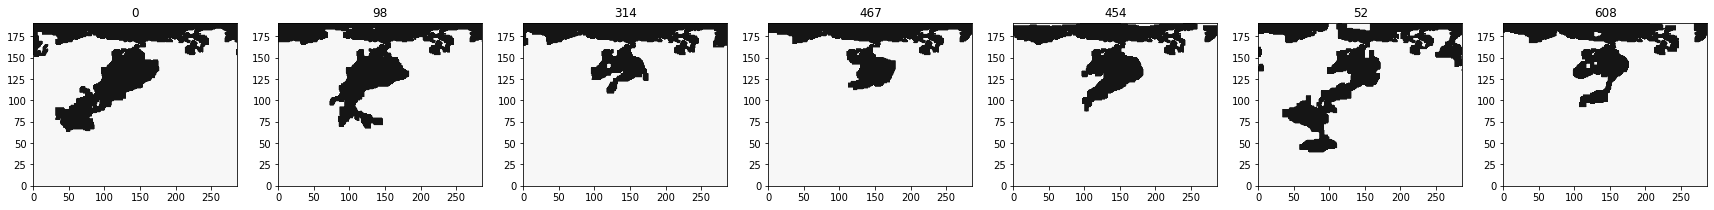

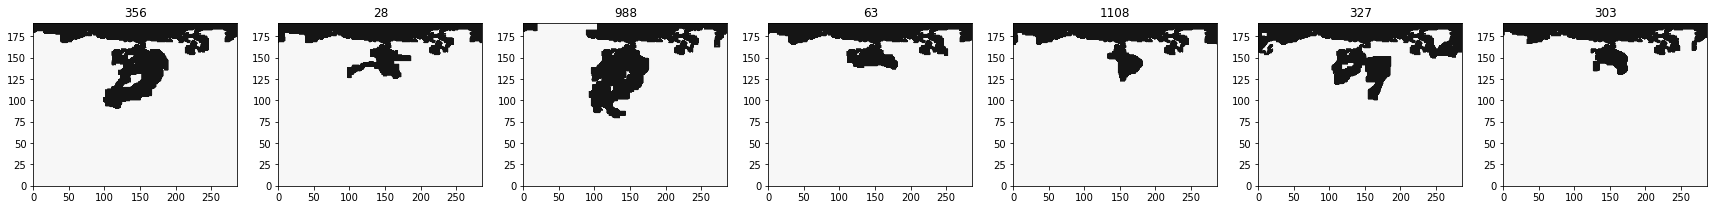

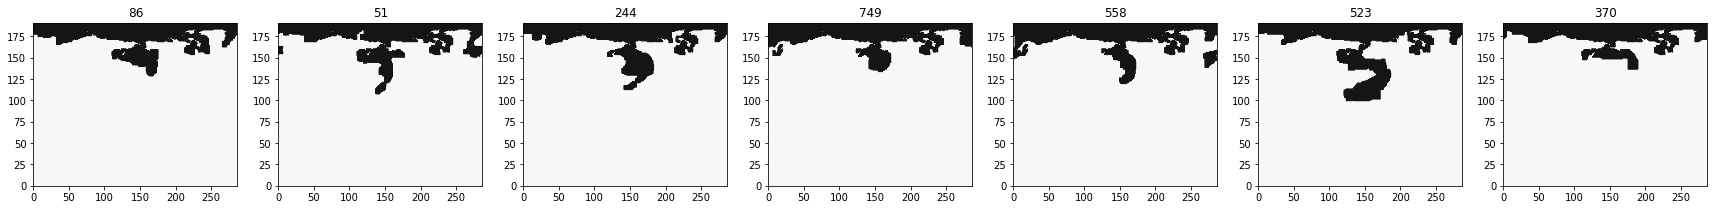

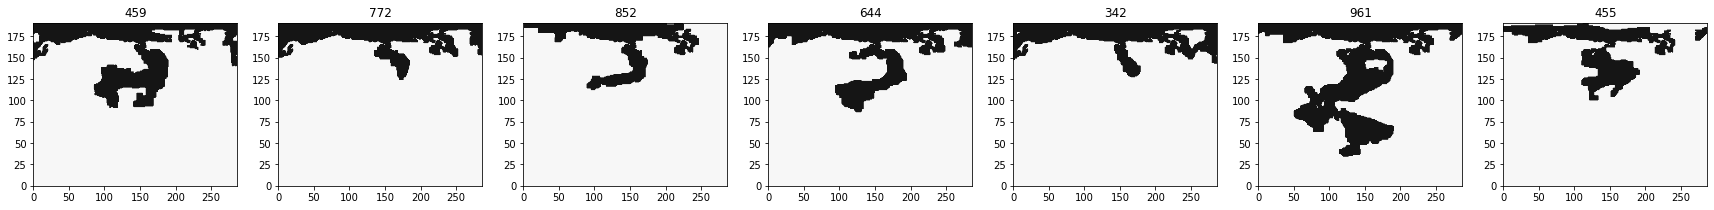

In [11]:
# let's check one at a time

mhw_id = 0 # choose which mhw event

sorted_first_row = np.sort(no_nans_x_l1_loss_full[mhw_id])
print('mean:',np.nanmean(no_nans_x_l1_loss_full[mhw_id]))
print('std:',np.nanstd(no_nans_x_l1_loss_full[mhw_id]))

mean = np.nanmean(no_nans_x_l1_loss_full[mhw_id])
sorted_first_row_ind = np.argsort(no_nans_x_l1_loss_full[mhw_id])

threshold_val = mean/2 # set a threshold distance metric. For example, we can maybe choose a threshold that is half the mean.

smallerthan_threshold = sorted_first_row[sorted_first_row <= threshold_val]
print('We have a set of',len(smallerthan_threshold),'MHWs.')
smallerthan_threshold_ind = list(sorted_first_row_ind[:len(smallerthan_threshold)])

plot_grid(no_nans_x_full, list(smallerthan_threshold_ind[:7])) 
plot_grid(no_nans_x_full, list(smallerthan_threshold_ind[7:14])) 
plot_grid(no_nans_x_full, list(smallerthan_threshold_ind[14:21])) 
plot_grid(no_nans_x_full, list(smallerthan_threshold_ind[21:28])) 

# plot_grid(no_nans_x_full, list(smallerthan_threshold_ind[-7:])) # plot the last 7

35
         mean       std  no. like mhws  std/mean
10   0.226218  0.052066              1  0.230159
22   0.308443  0.031504              1  0.102140
66   0.227881  0.042022              1  0.184404
80   0.276861  0.032892              1  0.118804
110  0.319524  0.047516              1  0.148709


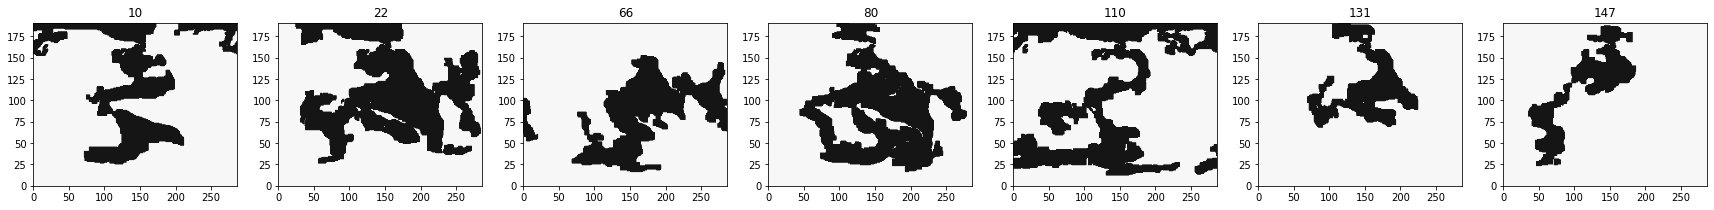

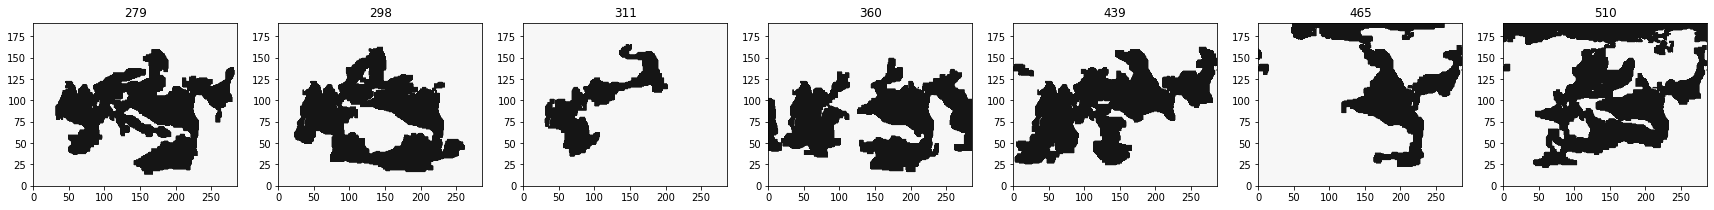

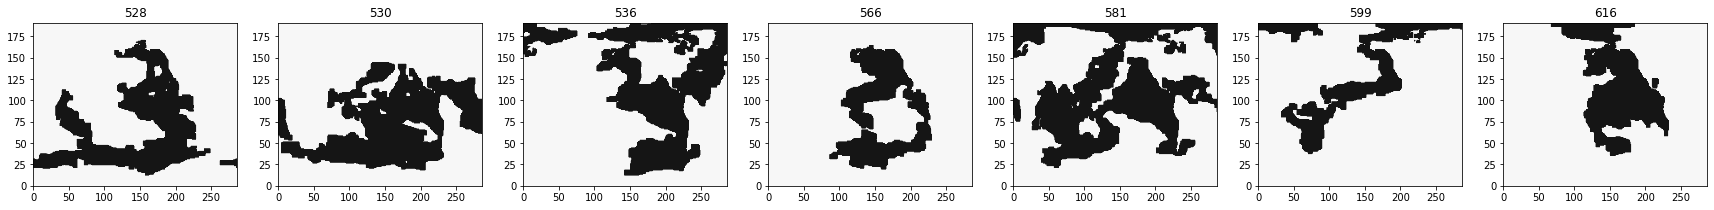

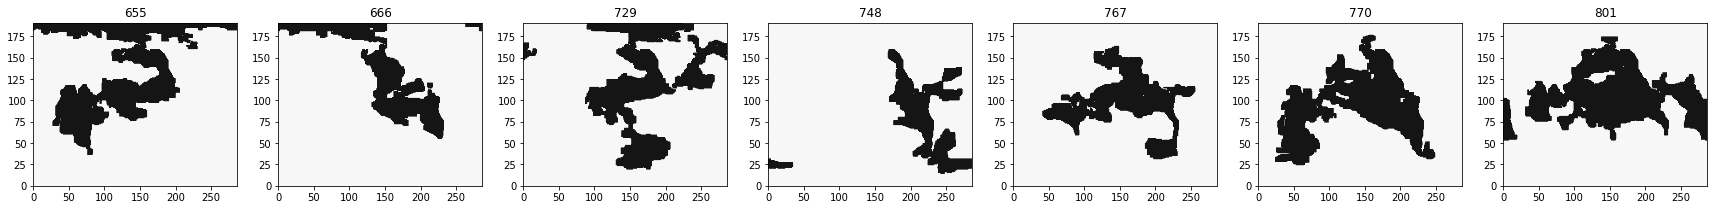

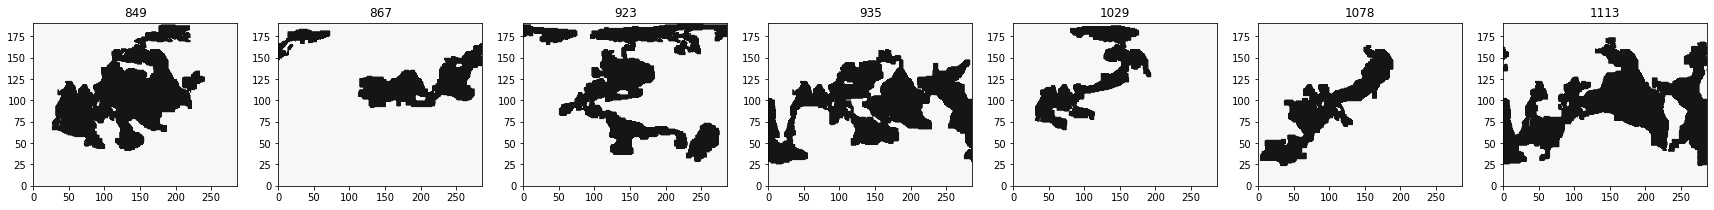

            mean        std  no. like mhws   std/mean
count  35.000000  35.000000           35.0  35.000000
mean    0.231360   0.046384            1.0   0.226764
std     0.063625   0.010699            0.0   0.112619
min     0.140021   0.031504            1.0   0.095815
25%     0.165762   0.039011            1.0   0.147392
50%     0.227881   0.043906            1.0   0.181699
75%     0.287806   0.051702            1.0   0.298861
max     0.347941   0.072007            1.0   0.476955
12571.74
21109.00
5830.00
4456.49
35


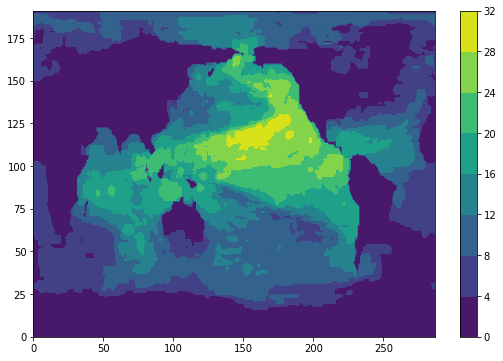

32.0

In [36]:
# these are apparently the super unique marine heatwaves
val = 1
print((thresholding_dataframe['no. like mhws'] <= val).sum())

mhw_indx = thresholding_dataframe.index[thresholding_dataframe['no. like mhws'] <= val].tolist()
unique_mhws = thresholding_dataframe.loc[mhw_indx]
print(unique_mhws.head())

plot_grid(no_nans_x_full, list(mhw_indx[:7]))
plot_grid(no_nans_x_full, list(mhw_indx[7:14]))
plot_grid(no_nans_x_full, list(mhw_indx[14:21]))
plot_grid(no_nans_x_full, list(mhw_indx[21:28]))
plot_grid(no_nans_x_full, list(mhw_indx[28:35]))
plt.show()
print(unique_mhws.describe())

# observation: these marine heatwaves look like they span a large area
no_grids = []
for i in mhw_indx:
    no_grids.append(no_nans_x_full[i].sum())
print("%.2f" % np.nanmean(no_grids))
print("%.2f" % np.nanmax(no_grids))
print("%.2f" % np.nanmin(no_grids))
print("%.2f" % np.nanstd(no_grids))

# let's try to make a standard heatwave using these items by summing them
avg_htw = 0
print(len(mhw_indx))
for i in range(0,len(mhw_indx)):
    avg_htw += no_nans_x_full[mhw_indx[i]]
    
plt.rcParams["figure.figsize"] = (9,6)
plt.contourf(avg_htw)
plt.colorbar()
plt.show()
np.max(avg_htw)

151
        mean       std  no. like mhws  std/mean
4   0.085270  0.083201            537  0.975738
5   0.084330  0.085161            541  1.009861
12  0.086971  0.083696            501  0.962354
17  0.085864  0.085734            521  0.998491
20  0.089493  0.085661            503  0.957182
             mean         std  no. like mhws    std/mean
count  151.000000  151.000000     151.000000  151.000000
mean     0.086478    0.085220     518.748344    0.985721
std      0.001598    0.001435      13.526871    0.021989
min      0.083876    0.081275     500.000000    0.933867
25%      0.085026    0.084455     507.500000    0.970953
50%      0.086177    0.085432     517.000000    0.988672
75%      0.087682    0.086290     528.000000    1.003466
max      0.090220    0.087440     553.000000    1.025826


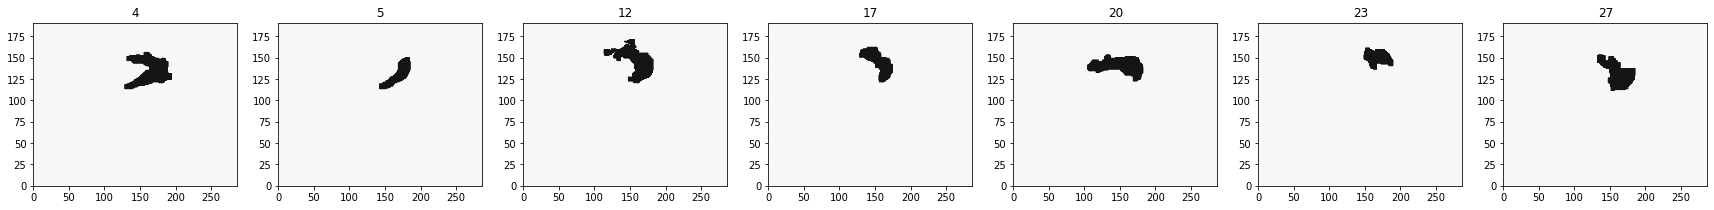

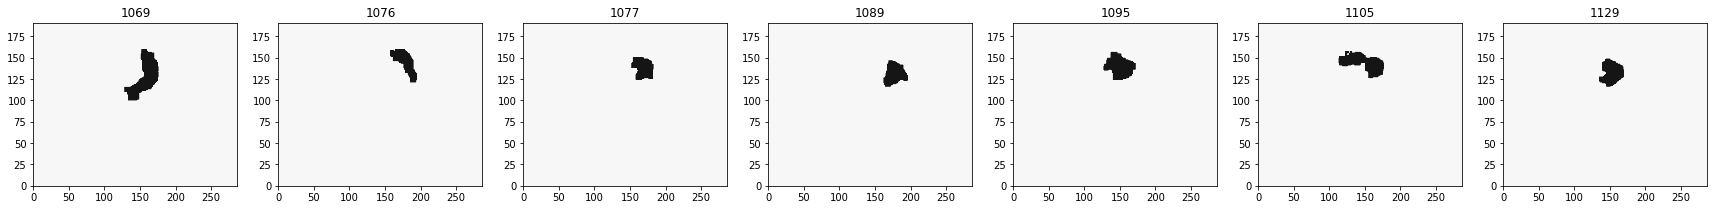

950.99
1771.00
11
565.00
251.71
151


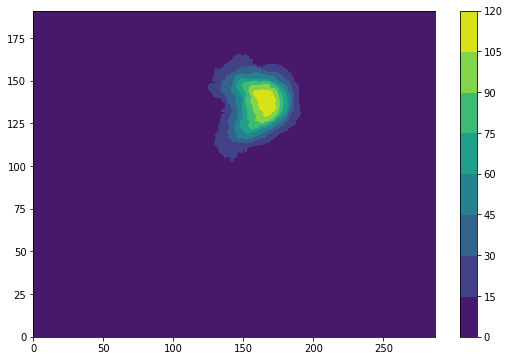

120.0

In [66]:
# let's look marine heatwaves at the opposite end of the spectrum
val = 500
print((thresholding_dataframe['no. like mhws'] >= val).sum())

mhw_indx = thresholding_dataframe.index[thresholding_dataframe['no. like mhws'] >= val].tolist()
notunique_mhws = thresholding_dataframe.loc[mhw_indx]
print(notunique_mhws.head())
print(notunique_mhws.describe())

plot_grid(no_nans_x_full, list(mhw_indx[:7]))
plot_grid(no_nans_x_full, list(mhw_indx[-7:]))
plt.show()
# observation: very small area-spanning marine heatwaves
no_grids = []
for i in mhw_indx:
    no_grids.append(no_nans_x_full[i].sum())
print("%.2f" % np.nanmean(no_grids))
print("%.2f" % np.nanmax(no_grids))
print(np.argmax(no_grids))
print("%.2f" % np.nanmin(no_grids))
print("%.2f" % np.nanstd(no_grids))

# let's try to make a standard heatwave using these items by summing them
avg_htw = 0
print(len(mhw_indx))
for i in range(0,len(mhw_indx)):
    avg_htw += no_nans_x_full[mhw_indx[i]]
    
plt.rcParams["figure.figsize"] = (9,6)
plt.contourf(avg_htw)
plt.colorbar()
plt.show()
np.max(avg_htw)

55


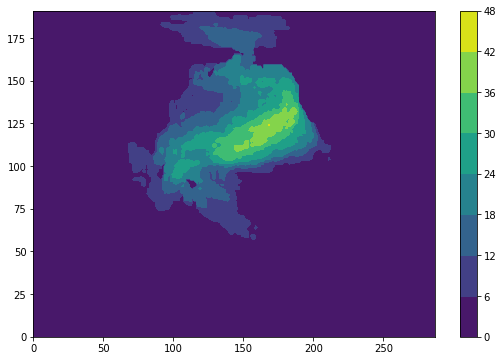

43.0

In [64]:
upper_range = 200
lower_range = 100

df_within_range = thresholding_dataframe[(thresholding_dataframe['no. like mhws'] >= lower_range) & (thresholding_dataframe['no. like mhws'] <= upper_range)]
mhw_indx = df_within_range.index.tolist()

avg_htw = 0
print(len(mhw_indx))
for i in range(0,len(mhw_indx)):
    avg_htw += no_nans_x_full[mhw_indx[i]]
    
plt.rcParams["figure.figsize"] = (9,6)
plt.contourf(avg_htw)
plt.colorbar()
plt.show()
np.max(avg_htw)

In [ ]:
# should check different thresholds and see the overlap between marine heatwave groups and the number of events in each group
# what does the threshold value mean?
# how many events do we want in each group?

In [ ]:
sorted_first_row = np.sort(no_nans_x_l1_loss_full[0])
sorted_first_row_ind = np.argsort(no_nans_x_l1_loss_full[0])
print(list(sorted_first_row_ind[:len(smallerthan_threshold)]))

In [ ]:
sorted_first_row = np.sort(no_nans_x_l1_loss_full[98])
print(sorted_first_row[:10])

sorted_first_row_ind = np.argsort(no_nans_x_l1_loss_full[98])
print(sorted_first_row_ind[:10])

In [ ]:
plt.contourf(no_nans_x_full[0])
plt.show()
plt.contourf(no_nans_x_full[98])
plt.show()
plt.contourf(no_nans_x_full[314])
plt.show()
plt.contourf(no_nans_x_full[467])
plt.show()
plt.contourf(no_nans_x_full[454])
plt.show()
plt.contourf(no_nans_x_full[52])
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

data = no_nans_x_l1_loss_full

hierarchical_cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward') # how to determine number of clusters
labels = hierarchical_cluster.fit_predict(data)

labels

In [ ]:
np.argmin(np.sort(labels)>2)

In [ ]:
print(np.argsort(labels))
print(np.sort(labels))
plt.hist(labels)

In [ ]:
np_no_nans_x_l1_loss_full = np.array(no_nans_x_l1_loss_full)
means_np_no_nans_x_l1_loss_full = np.mean(np_no_nans_x_l1_loss_full, axis=1)
plt.scatter(np.arange(1131), means_np_no_nans_x_l1_loss_full, alpha=0.3); plt.show()

np_no_nans_x_MSE_loss_full = np.array(no_nans_x_MSE_loss_full)
means_np_no_nans_x_MSE_loss_full = np.mean(np_no_nans_x_MSE_loss_full, axis=1)
plt.scatter(np.arange(1131), means_np_no_nans_x_MSE_loss_full, alpha=0.3); plt.show()

In [ ]:
plt.subplot(1, 2, 1); plt.ylim(0,1.0); plt.scatter(np.arange(len(no_nans_x_l1_loss_full)),no_nans_x_l1_loss_full[0], alpha=0.3)
plt.subplot(1, 2, 2); plt.ylim(0,1.0); plt.scatter(np.arange(len(no_nans_x_MSE_loss_full)),no_nans_x_MSE_loss_full[0], alpha=0.3)
plt.show()
print(np.nanmean(no_nans_x_l1_loss_full[0]), np.nanmean(no_nans_x_MSE_loss_full[0])) 
# this is a measure of uniqueness (I think this will give us a sense of whether this cluster will be big)

plt.subplot(1, 2, 1); plt.ylim(0,1.0); plt.scatter(np.arange(len(no_nans_x_l1_loss_full)),no_nans_x_l1_loss_full[1], alpha=0.3)
plt.subplot(1, 2, 2); plt.ylim(0,1.0); plt.scatter(np.arange(len(no_nans_x_MSE_loss_full)),no_nans_x_MSE_loss_full[1], alpha=0.3)
plt.show()
print(np.nanmean(no_nans_x_l1_loss_full[1]), np.nanmean(no_nans_x_MSE_loss_full[1]))

plt.subplot(1, 2, 1); plt.ylim(0,1.0); plt.scatter(np.arange(len(no_nans_x_l1_loss_full)),no_nans_x_l1_loss_full[2], alpha=0.3)
plt.subplot(1, 2, 2); plt.ylim(0,1.0); plt.scatter(np.arange(len(no_nans_x_MSE_loss_full)),no_nans_x_MSE_loss_full[2], alpha=0.3)
plt.show()
print(np.nanmean(no_nans_x_l1_loss_full[2]), np.nanmean(no_nans_x_MSE_loss_full[2]))

plt.subplot(1, 2, 1); plt.ylim(0,1.0); plt.scatter(np.arange(len(no_nans_x_l1_loss_full)),no_nans_x_l1_loss_full[3], alpha=0.3)
plt.subplot(1, 2, 2); plt.ylim(0,1.0); plt.scatter(np.arange(len(no_nans_x_MSE_loss_full)),no_nans_x_MSE_loss_full[3], alpha=0.3)
plt.show()
print(np.nanmean(no_nans_x_l1_loss_full[3]), np.nanmean(no_nans_x_MSE_loss_full[3]))

In [ ]:
Xnum = 50

sorted_lists = []
argsorted_lists = []

for i in range(len(no_nans_x_l1_loss_full)):
    sorted_mostsimilarXnum_no_nans_x_l1_loss_full = np.sort(no_nans_x_l1_loss_full[i][:Xnum])
    sorted_lists.append(sorted_mostsimilarXnum_no_nans_x_l1_loss_full)
    argsorted_mostsimilarXnum_no_nans_x_l1_loss_full = np.argsort(no_nans_x_l1_loss_full[i][:Xnum])
    argsorted_lists.append(argsorted_mostsimilarXnum_no_nans_x_l1_loss_full)

In [ ]:
print(type(argsorted_lists))
print(argsorted_lists)

In [ ]:
%%timeit

similarity_metric = []
for i in range(len(argsorted_lists)):
    similarity_metric_ls = []
    for j in range(len(argsorted_lists)):
        sm = difflib.SequenceMatcher(None, argsorted_lists[i], argsorted_lists[j])
        similarity_metric_ls.append(sm.ratio())
    similarity_metric.append(similarity_metric_ls)

In [ ]:
similarity_metric

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

X = no_nans_x_l1_loss_full

clustering = AgglomerativeClustering().fit(X)
clustering

plt.hist(clustering.labels_)

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = argsorted_lists

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) 
    mapping2[k] = kmeanModel.inertia_

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="random",
                n_clusters=8, # elbow plot
                n_init=10,
                max_iter=300,
                random_state=42)

In [ ]:
kmeans.fit(argsorted_lists)

In [ ]:
kmeans.labels_

In [ ]:
plt.hist(kmeans.labels_)

In [ ]:
ind_0 = []; ind_1 = []; ind_2 = []; ind_3 = []
ind_4 = []; ind_5 = []; ind_6 = []; ind_7 = []

for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] == 0:
        ind_0.append(i)
    elif kmeans.labels_[i] == 1:
        ind_1.append(i)
    elif kmeans.labels_[i] == 2:
        ind_2.append(i)
    elif kmeans.labels_[i] == 3:
        ind_3.append(i)
    elif kmeans.labels_[i] == 4:
        ind_4.append(i)
    elif kmeans.labels_[i] == 5:
        ind_5.append(i)
    elif kmeans.labels_[i] == 6:
        ind_6.append(i)
    elif kmeans.labels_[i] == 7:
        ind_7.append(i)

In [ ]:
print(len(ind_0))
print(len(ind_1))
print(len(ind_2))
print(len(ind_3))
print(len(ind_4))
print(len(ind_5))
print(len(ind_6))
print(len(ind_7))

In [ ]:
similarity_metric = []
for i in range(len(argsorted_lists)):
    print(i)
    for j in range(len(argsorted_lists)):
        sm = difflib.SequenceMatcher(None,argsorted_lists[i],argsorted_lists[j])
        similarity_metric.append(sm.ratio())

In [ ]:
similarity_metric

In [ ]:
import difflib
sm = difflib.SequenceMatcher(None,argsorted_lists[0],argsorted_lists[2])
sm.ratio()

In [ ]:
new_list = []
for i in range(len(argsorted_lists)):
    sm = difflib.SequenceMatcher(None,argsorted_lists[0],argsorted_lists[i])
    print(sm.ratio())
    new_list.append(sm.ratio())

In [ ]:
plt.hist(new_list)

In [ ]:
np.argsort(new_list)

In [ ]:
plt.scatter(np.argsort(new_list), np.sort(new_list), alpha=0.3)

In [ ]:
plt.contourf(no_nans_x_full[0])
plt.show()
plt.contourf(no_nans_x_full[100])
plt.show()
plt.contourf(no_nans_x_full[1])
plt.show()

In [ ]:
argsorted_lists

In [ ]:
plt.contourf(no_nans_x_full[4])
plt.show()

In [ ]:
plt.contourf(no_nans_x_full[678])
plt.show()

In [ ]:
plt.contourf(no_nans_x_full[690])
plt.show()

In [ ]:
print(np.argsort(no_nans_x_l1_loss_full[4]))
print(np.sort(no_nans_x_l1_loss_full[4]))


In [ ]:
plt.scatter(np.argsort(no_nans_x_l1_loss_full[0]), np.sort(no_nans_x_l1_loss_full[0]),alpha=0.3)

In [ ]:
plt.scatter(np.argsort(no_nans_x_l1_loss_full[1]), np.sort(no_nans_x_l1_loss_full[1]),alpha=0.3)

In [ ]:
# Notes
# Run this with OISST